### 02. 소프트맥스 회귀                 
- 앞서 로지스틱 회귀를 통해 2개의 선택지 중에서 1개를 고르는 이진 분류
- 이제 소프트맥스 회귀를 통해 3개의 선택지 중에서 1개를 고르는 다중 클래스 분류

#### 1. 다중 클래스 분류
ex) 위 붓꽃 품종 분류하기 문제
- 입력은 X, 가중치는 W, 편향은 B, 출력은 Y(hat)으로 각 변수는 벡터 또는 행렬로 가정
- Y(hat)은 예측값이라는 의미를 가지고 있으므로 가설식에서 H(X) 대신 사용되기도 한다.

##### 1. 로지스틱 회귀
- **로지스틱 회귀에서 시그모이드 함수**는 예측값을 0과 1사이의 값으로 만든다
    -EX) 스팸 메일 분류기를 로지스틱 회귀로 구현하였을 때, 출력이 0.75라면 이는 이메일이 스팸일 확률이 75%라는 의미(반대로 스팸 메일이 아닐 확률은 25%)
- 가설 : H(X) = sigmoid(WX+B)

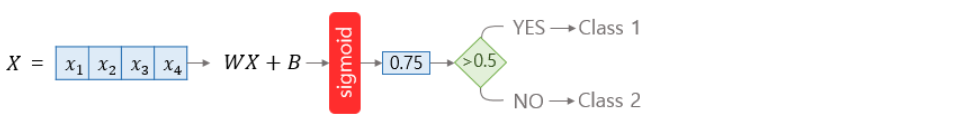

In [2]:
from IPython.display import Image
Image("logistic.PNG")

##### 2. 소프트맥스 회귀
- 확률의 총 합이 1이 되는 이 아이디어를 다중 클래스 분류 문제에 적용한다.
- 각 클래스(선택지)마다 소수 확률을 할당하고 총 확률의 합은 1이 되어야 한다. 
- 가설 : H(X) = softmax(WX+B)

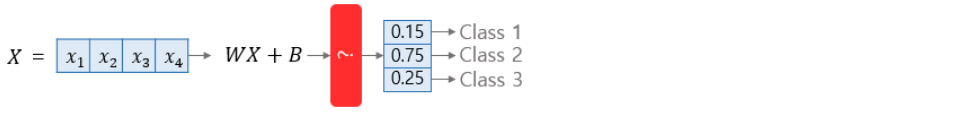

In [3]:
from IPython.display import Image
Image("softmax.PNG")

-------------------------------------------------------------------------------------------------------

#### 2. 소프트맥스 함수
정답지(클래스)의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정한다. 

##### 1) 소프트맥스 함수의 이해
- k차원의 벡터에서 i번째 원소를 zi, i번째 클래스가 정답일 확률을 pi로 나타낸다고 하였을 때, 소프트맥스 함수는 pi를 다음과 같이 정의한다. 

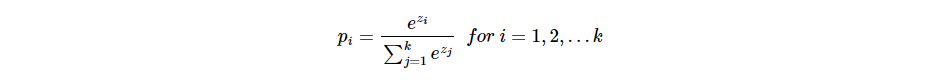

In [4]:
from IPython.display import Image
Image("softmax1.PNG")

- 위에서 풀어야하는 문제의 경우 k=3이므로 3차원 벡터 z=[z1, z2, z3]의 입력을 받으려면 소프트맥스 함수는 아래와 같은 출력을 리턴한다. 

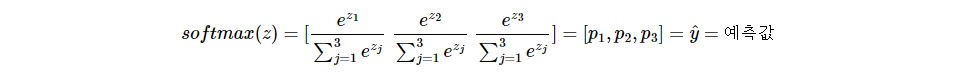

In [5]:
from IPython.display import Image
Image("softmax2.PNG")

- p1, p2, p3 각각은 1번 클래스가 정답일 확률, 2번 클래스가 정답일 확률, 3번 클래스가 정답일 확률을 나타내며 각각 0과 1사이의 값으로 총 합은 1이 된다.
- 지정 순서는 문제를 풀고자 하는 사람의 무작위 선택이고, 이에따라 식을 문제에 맞게 다시 쓰면 아래와 같다. 

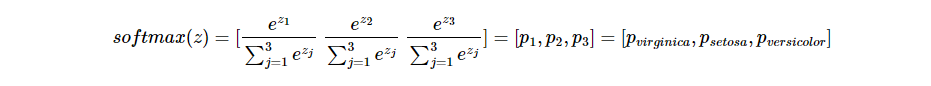

In [6]:
from IPython.display import Image
Image("softmax3.PNG")

##### 2) 그림을 통한 이해

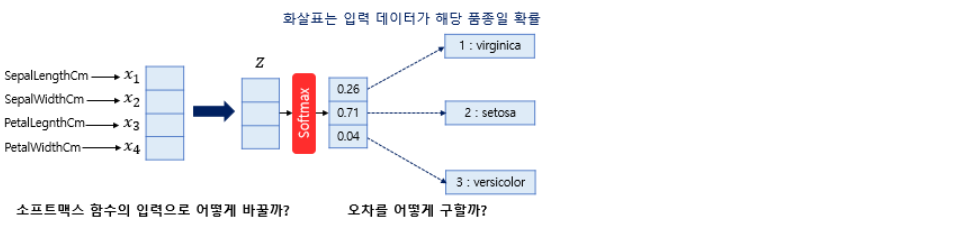

In [7]:
from IPython.display import Image
Image("softmax4.PNG")

- 샘플 데이터를 1개씩 입력으로 받아 처리한다고 가정(즉, 배치 크기가 1)
- 1. 소프트맥스의 함수의 입력
    - 하나의 샘플 데이터는 4개의 독립 변수 x를 가지는데 이는 모델이 4차원 벡터를 입력으로 받음을 의미한다.
    - 그런데 소프트맥스의 함수의 입력으로 사용되는 벡터는 차원이 분류하고자 하는 클래스의 개수가 되어야 하므로 어떤 가중치 연산을 통해 3차원 벡터로 변환되어야 한다.
    - 샘플 데이터 벡터를 소프트맥스 함수의 입력 벡터로 차원을 축소하는 방법 : 소프트맥스 함수의 입력 벡터 z의 차원수만큼 결과값이 나오도록 **가중치 곱**을 진행한다. 아래의 그림에서 화살표는 총 12개(4x3)이며 전부 다른 가중치를 가지고, 학습 과정에서 점차적으로 오차를 최소화하는 가중치로 값이 변경된다. 

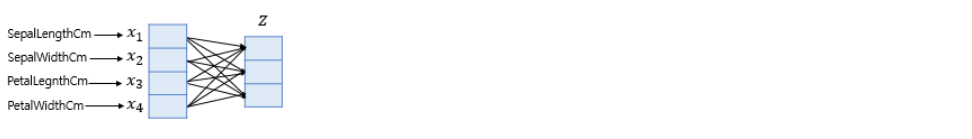

In [8]:
from IPython.display import Image
Image("softmax5.PNG")

- 2. 오차 계산 방법
    - 소프트맥스 함수의 출력은 분류하고자하는 클래스의 개수만큼 차원을 가지는 벡터로 각 원소는 0과 1사이의 값을 가지고, 각각은 특정 클래스가 정답일 확률을 나타낸다. 
    - 첫번째 원소인 p1은 virginica가 정답일 확률, p2는 setosa가 정답일 확률, p3는 versicolor가 정답일 확률
    - 이 예측값과 비교할 수 있는 실제값의 표현 방법이 있어야 한다.(소프트맥스 회귀에서는 실제값을 원-핫 벡터로 표현)

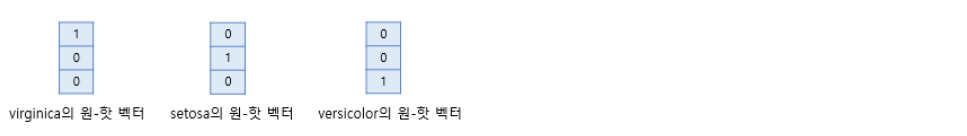

In [9]:
from IPython.display import Image
Image("softmax6.PNG")

- 위의 그림은 첫번째 원소인 p1은 virginica가 정답일 확률, p2는 setosa가 정답일 확률, p3는 versicolor가 정답일 확률을 의미한다고 하였을 때, 각 실제값의 정수 인코딩은 1, 2, 3이 되고 여기에 원-핫 인코딩을 수행하여 실제값을 원-핫 벡터로 수치화 한 것

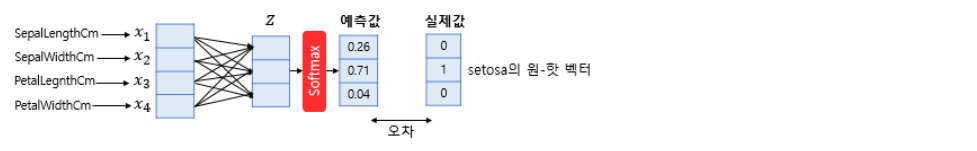

In [10]:
from IPython.display import Image
Image("softmax7.PNG")

- 예를 들어, 현재 풀고 이쓴ㄴ 샘플 데이터의 실제값이 setosa라면 setosa의 원-핫 벡터는 [0 1 0]이다.
- 이 경우 예측값과 실제값의 오차가 0이 되는 경우는 소프트맥스 함수의 결과가 [0 1 0]이 되는 경우이다.
- 두 벡터의 오차를 계산하기 위해서 소프트맥스 회귀는 비용함수로 크로스 엔트로피 함수를 사용한다. 

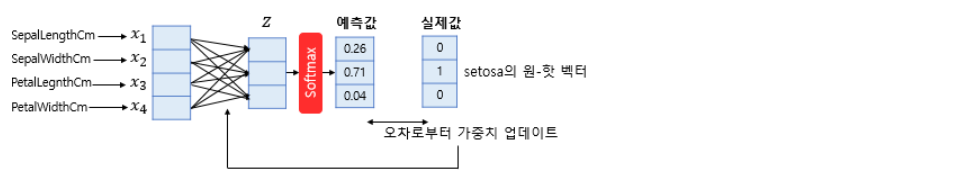

In [11]:
from IPython.display import Image
Image("softmax8.PNG")

- 앞서 배운 선형 회귀나 로지스틱 회귀와 마찬가지로 오차로부터 가중치를 업데이트한다. 

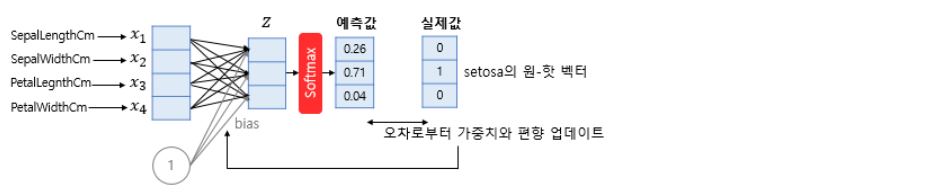

In [12]:
from IPython.display import Image
Image("softmax9.PNG")

- 더 정확히는 선형 회귀나 로지스틱 회귀와 마찬가지로 편향 또한 업데이터의 대상이 되는 매개변수이다.
- 소프트맥스 회귀를 벡터와 행렬 연산으로 이해한다.
- 입력의 특성(feature)의 수만큼의 차원을 가진 입력 벡터 x라고 하고, 가중치 행렬을 X, 편향을 b라고 하였을 때, 소프트맥스 회귀에서 예측값을 구하는 과정을 벡터와 행렬 연산으로 표현하면 아래와 같다. 
    - 여기서 f는 특성의 수, c는 클래스의 개수

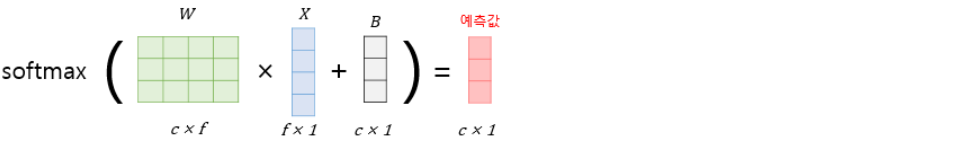

In [13]:
from IPython.display import Image
Image("softmax10.PNG")

#### 3. 붓꽃 품종 분류하기 행렬 연산으로 이해하기
- 전체 샘플의 개수가 5개, 특성이 4개이므로 5x4 행렬 X로 정의

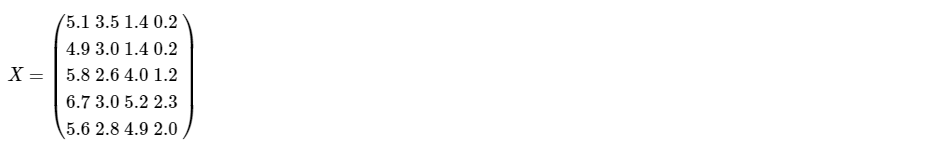

In [14]:
from IPython.display import Image
Image("matrix1.PNG")

- 편의를 위해 각 행렬의 원소 위치를 반영한 변수로 표현

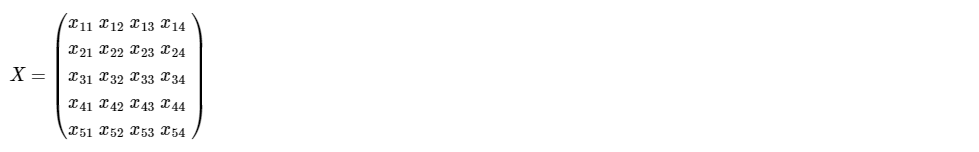

In [15]:
from IPython.display import Image
Image("matrix2.PNG")

- 이번 문제는 선택지가 총 3개인 문제이므로 가설의 예측값으로 얻는 행렬의 열의 개수는 3개여야 한다.
- 각 행은 행렬 X의 각 행의 예측값이므로 행의 크기는 동일해야 한다. 결과적으로 크기는 5X3

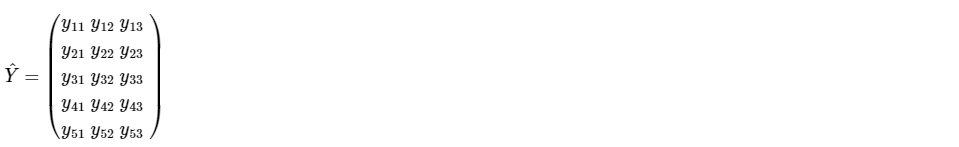

In [16]:
from IPython.display import Image
Image("matrix3.PNG")

- 크기 5X3 행렬의 크기는 5X4 입력 행렬 X와 가중치 행렬 W의 곱으로 얻어지는 행렬이므로 가중치 행렬 W의 크기는 4X3의 크기를 가진 행렬

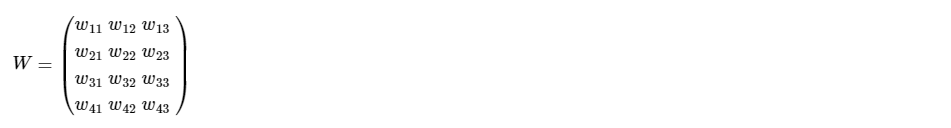

In [17]:
from IPython.display import Image
Image("matrix4.PNG")

- 편향 행렬 B는 예측값 행렬과 크기가 동일해야 하므로 5X3의 크기를 가진다.

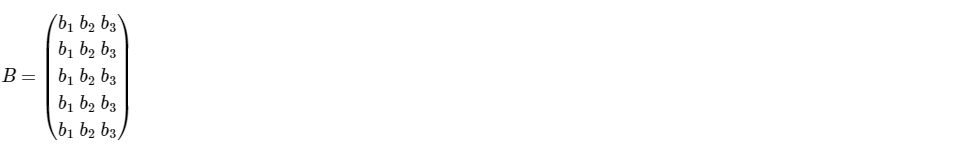

In [18]:
from IPython.display import Image
Image("matrix5.PNG")

- 결과적으로 가설식은 아래와 같다.

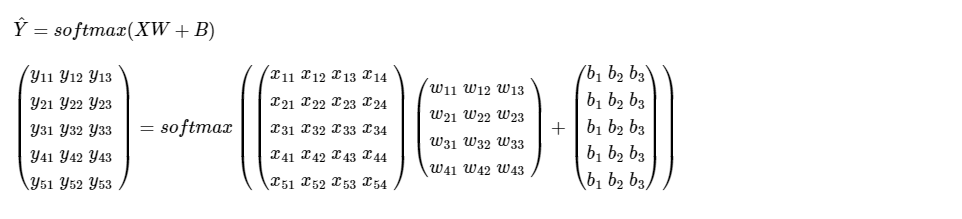

In [19]:
from IPython.display import Image
Image("matrix6.PNG")

#### 4. 비용 함수

##### 1) 크로스 엔트로피 함수
- y : 실제값, k : 클래스의 개수, y_j : 실제값 원-핫 벡터의 j번째 인덱스, p_j : 샘플 데이터가 j번째 클래스일 확률(y_j^hat)

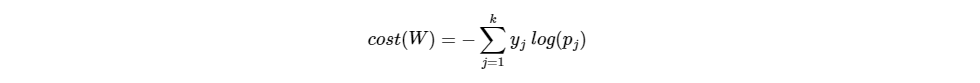

In [20]:
from IPython.display import Image
Image("cross1.PNG")

- c가 실제값 원-핫 벡터에서 1을 가진 원소의 인덱스라고 한다면, p_c=1은 y^hat가 y를 정확하게 예측한 경우가 된다.
    - 이를 식에 대입해보면 -1log(1)=0이 되기 때문에 결과적으로 y^hat이 y를 정확하게 예측한 경우의 크로스 엔트로피 함수의 값은 0이 된다.
    - 즉, 위의 식을 최소화하는 방향으로 학습해야 한다.
- 이를 n개의 전체 데이터에 대한 평균을 구한다고 하면 최종 비용 함수는 아래와 같다. 

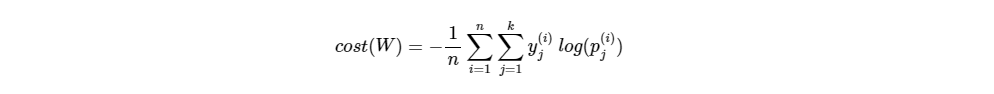

In [21]:
Image("cross2.PNG")

##### 2) 이진 분류에서의 크로스 엔트로피 함수
- 로지스틱 회귀에서 배운 크로스 엔트로피 함수식과 달라보이지만 본질적으로 동일한 함수이다.
- 로지스틱 회귀의 크로스 엔트로피 함수식으로부터 소프트맥스 회귀의 크로스 엔트로피 함수식을 도출

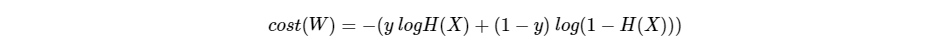

In [22]:
Image("cross3.PNG")

- 위의 식은 로지스틱 회귀에서 배웠던 크로스 엔트로피의 함수식
- y를 y1, y-1을 y2로 치환, H(X)를 p1, 1-H(X)를 p2로 치환하면 아래와 같다.

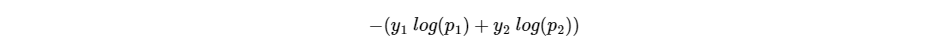

In [26]:
Image("cross4.PNG")

- 위의 식은 아래와 같이 표현할 수 있다.

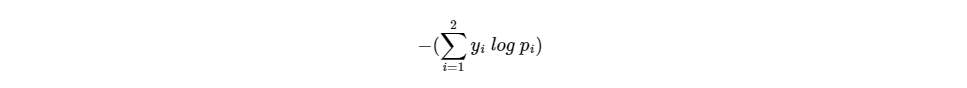

In [27]:
Image("cross5.PNG")

- 소프트맥스 회귀에서는 k의 값이 고정된 값이 아니므로 2를 k로 변경

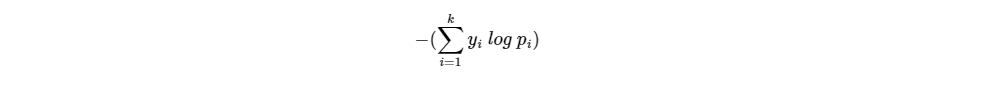

In [28]:
Image("cross6.PNG")

- 소프트맥스의 함수의 최종 비용 함수에서 k가 2라고 가정하면 결국 로지스틱 회귀의 비용함수와 같다. 

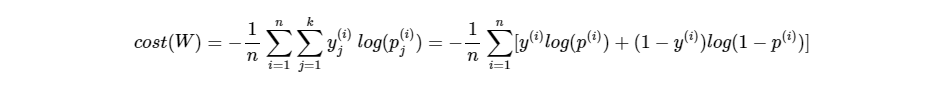

In [29]:
Image("cross7.PNG")